In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Read the given CSV file, and view some sample records

leadScoringData = pd.read_csv("Leads.csv")
leadScoringData.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leadScoringData.shape

(9240, 37)

In [5]:
leadScoringData.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
leadScoringData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#List of variable to map
varList = ['A free copy of Mastering The Interview','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses','Through Recommendations','Digital Advertisement','Newspaper','X Education Forums','Newspaper Article','Magazine','Search', 'Do Not Email','Do Not Call']

#defining map function
def binary_map(x):
    return x.map({'Yes':1, 'No':0})

#Applying function to list
leadScoringData[varList]=leadScoringData[varList].apply(binary_map)
leadScoringData.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [8]:
leadScoringData.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [9]:
leadScoringData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
leadScoringData['City'] = leadScoringData['City'].replace('Select',np.NaN)
leadScoringData['Lead Profile'] = leadScoringData['Lead Profile'].replace('Select',np.NaN)
leadScoringData['Specialization'] = leadScoringData['Specialization'].replace('Select',np.NaN)
leadScoringData['How did you hear about X Education'] = leadScoringData['How did you hear about X Education'].replace('Select',np.NaN)

In [11]:
#Get total of missing fields
leadScoringData.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
leadScoringData['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [13]:
leadScoringData['What matters most to you in choosing a course'] = leadScoringData['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [14]:
leadScoringData['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [15]:
leadScoringData['What is your current occupation'] = leadScoringData['What is your current occupation'].replace(np.nan, 'Unemployed')

In [16]:
# Country is India for most values
leadScoringData['Country'] = leadScoringData['Country'].replace(np.nan, 'India')

In [17]:
#removed columns which have null values more than 35%
leadScoringData = leadScoringData[leadScoringData.columns[leadScoringData.isnull().sum() / len(leadScoringData) < 0.35]]
leadScoringData.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,0,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,0,0,0,0,0,0,Modified


In [18]:
# Rest missing values are under 2% so we can drop these rows.
leadScoringData.dropna(inplace = True)

In [19]:
leadScoringData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   int64  
 5   Do Not Call                                    9074 non-null   int64  
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [20]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

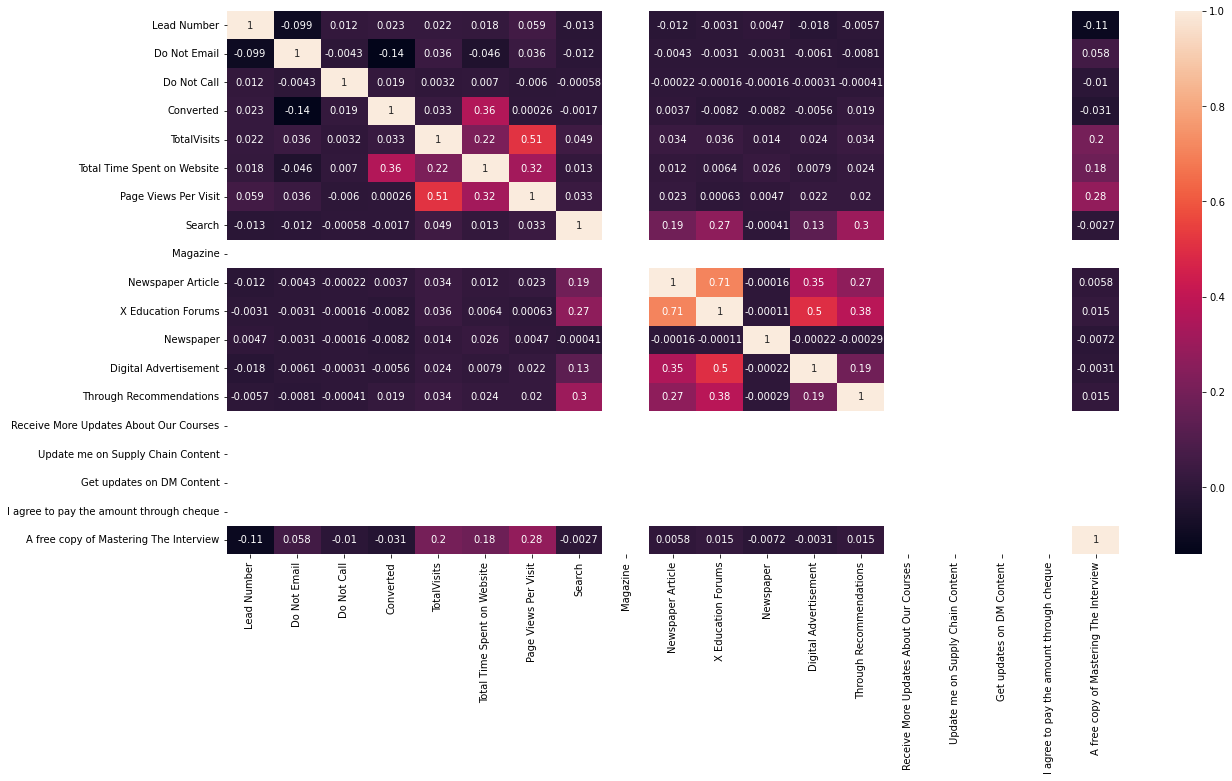

In [21]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leadScoringData.corr(),annot = True)
plt.show()

In [22]:
#remove unuseful data
leadScoringData = leadScoringData.drop(['I agree to pay the amount through cheque', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content', 'Magazine','X Education Forums'], axis=1)

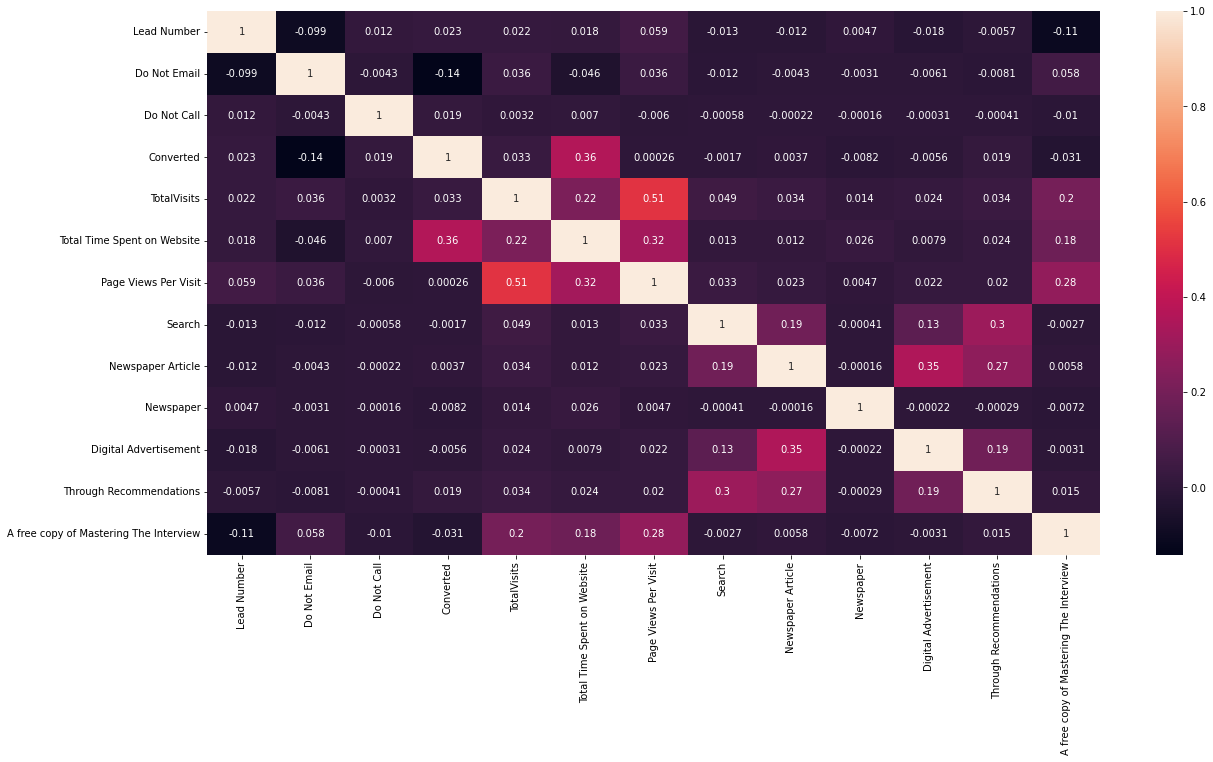

In [23]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leadScoringData.corr(),annot = True)
plt.show()

In [24]:
#create dummy data
dummy=pd.get_dummies(leadScoringData[['What matters most to you in choosing a course','Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 'Last Notable Activity']], drop_first=True)

leadScoringData=pd.concat([leadScoringData, dummy], axis=1)

In [25]:
leadScoringData = leadScoringData.drop(['What matters most to you in choosing a course','Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 'Last Notable Activity'], axis=1)

In [26]:
leadScoringData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 76 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Prospect ID                                                              9074 non-null   object 
 1   Lead Number                                                              9074 non-null   int64  
 2   Do Not Email                                                             9074 non-null   int64  
 3   Do Not Call                                                              9074 non-null   int64  
 4   Converted                                                                9074 non-null   int64  
 5   TotalVisits                                                              9074 non-null   float64
 6   Total Time Spent on Website                                             

In [27]:
#Test train Split

#putting feature variable to X
X = leadScoringData.drop(['Prospect ID', 'Converted', 'Country', 'Lead Number'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [28]:
#putting response varibale into Y
y = leadScoringData['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [29]:
#split test data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [30]:
#Feature scaling
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.284595,-0.160255,-0.179666,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.284595,-0.540048,-0.179666,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.284595,1.643304,-0.179666,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.295588,2.017593,0.058552,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [32]:
### Step 7: Model Building
#Let's start by splitting our data into a training set and a test set.
#Train first model

import statsmodels.api as sm

In [33]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6282
Model Family:                Binomial   Df Model:                           68
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2576.8
Date:                Sun, 05 Mar 2023   Deviance:                       5153.6
Time:                        21:05:09   Pearson chi2:                 6.37e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4064
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      26.0825   7.94e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                                                               -1.6218      0.226     -7.181      0.000      -2.064      -1.179
Do Not Call                                                                23.1947   5.41e+04      0.000      1.000   -1.06e+05    1.06e+05
TotalVisits                                                                 0.2074      0.054      3.821      0.000       0.101       0.314
Total Time Spent on Website                                                 1.1355      0.041     27.552      0.000       1.055       1.216
Page Views Per Visit                                                       -0.1057      0.052     -2.026      0.043      -0.208      -0.003
Search                                                                     -0.1972      0.904     -0.218      0.827      -1.970       1.576
Newspaper Article                                                           1.1552      1.694      0.682      0.495      -2.165       4.475
Newspaper                                                                 -25.0925   8.01e+04     -0.000      1.000   -1.57e+05    1.57e+05
Digital Advertisement                                                      -0.6123      1.449     -0.423      0.673      -3.452       2.227
Through Recommendations                                                     0.1300      1.386      0.094      0.925      -2.587       2.847
A free copy of Mastering The Interview                                      0.0130      0.108      0.121      0.904      -0.198       0.224
What matters most to you in choosing a course_Flexibility & Convenience  7.014e-10   8.75e-06   8.02e-05      1.000   -1.71e-05    1.71e-05
What matters most to you in choosing a course_Other                       -20.5697   7.85e+04     -0.000      1.000   -1.54e+05    1.54e+05
Lead Origin_Landing Page Submission                                        -0.1974      0.107     -1.852      0.064      -0.406       0.012
Lead Origin_Lead Add Form                                                  -0.2605      1.723     -0.151      0.880      -3.637       3.116
Lead Origin_Lead Import                                                    25.3595   7.99e+04      0.000      1.000   -1.56e+05    1.57e+05
Lead Source_Direct Traffic                                                 -3.0230      2.158     -1.401      0.161      -7.252       1.206
Lead Source_Facebook                                                      -26.8313   7.99e+04     -0.000      1.000   -1.57e+05    1.56e+05
Lea

In [34]:
#Feature selection using RFE 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [35]:
rfe.support_

array([ True,  True, False,  True, False, False, False,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False,  True, False, False,  True, False, False, False,
        True,  True, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False,  True, False,
        True,  True,  True, False,  True, False,  True, False, False,
        True,  True,  True,  True, False, False, False, False, False])

In [36]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 30),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 35),
 ('Search', False, 41),
 ('Newspaper Article', False, 17),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 34),
 ('Through Recommendations', False, 40),
 ('A free copy of Mastering The Interview', False, 45),
 ('What matters most to you in choosing a course_Flexibility & Convenience',
  False,
  47),
 ('What matters most to you in choosing a course_Other', False, 42),
 ('Lead Origin_Landing Page Submission', False, 25),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 11),
 ('Lead Source_Facebook', False, 46),
 ('Lead Source_Google', False, 14),
 ('Lead Source_Live Chat', False, 26),
 ('Lead Source_NC_EDM', False, 15),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 13),
 ('Lead Source_Pay per Click Ads', False, 31)

In [37]:
col = X_train.columns[rfe.support_]

In [38]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Search', 'Newspaper Article',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'What matters most to you in choosing a course_Other',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Web

In [39]:
# Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2618.1
Date:                Sun, 05 Mar 2023   Deviance:                       5236.3
Time:                        21:05:12   Pearson chi2:                 6.39e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3986
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3752      0.604      2.278      0.023       0.192       2.558
Do Not Email                                            -1.6038      0.200     -8.025      0.000      -1.995      -1.212
Do Not Call                                             22.3142   3.36e+04      0.001      0.999   -6.59e+04    6.59e+04
Total Time Spent on Website                              1.1370      0.041     27.922      0.000       1.057       1.217
Newspaper                                              -24.0899   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Origin_Lead Add Form                                2.1388      0.927      2.308      0.021       0.323       3.955
Lead Origin_Lead Import                                  1.5458      0.457      3.381      0.001       0.650       2.442
Lead Source_Olark Chat                                   1.2496      0.105     11.951      0.000       1.045       1.455
Lead Source_Reference                                    1.7994      0.951      1.891      0.059      -0.065       3.664
Lead Source_Social Media                                 2.1035      1.421      1.480      0.139      -0.682       4.889
Lead Source_Welingak Website                             3.8678      1.176      3.289      0.001       1.563       6.173
Lead Source_google                                     -21.2803    2.1e+04     -0.001      0.999   -4.12e+04    4.11e+04
Last Activity_Converted to Lead                         -1.1113      0.228     -4.865      0.000      -1.559      -0.664
Last Activity_Email Bounced                             -1.2808      0.425     -3.010      0.003      -2.115      -0.447
Last Activity_Had a Phone Conversation                   1.7790      1.157      1.537      0.124      -0.489       4.047
Last Activity_Olark Chat Conversation                   -1.3606      0.193     -7.063      0.000      -1.738      -0.983
What is your current occupation_Housewife               21.6446   1.57e+04      0.001      0.999   -3.08e+04    3.08e+04
What is your current occupation_Student                 -0.7927      0.639     -1.241      0.215      -2.045       0.459
What is your current occupation_Unemployed              -1.1988      0.600     -1.999      0.046      -2.374      -0.023
What is your current occupation_Working Professional     1.5652      0.627      2.498      0.012       0.337       2.793
Last Notable Activity_Email Link Clicked                -1.8841      0.255     -7.377      0.000      -2.385      -1.384
Last Notable Activity_Email Opened                      -1.4221      0.088    -16.077      0.000      -1.596      -1.249
Last Notable Activity_Had a Phone Conversation           0

In [40]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.193427
1012    0.363979
9226    0.209627
4750    0.885424
7987    0.674264
1281    0.771844
2880    0.095547
4971    0.912220
7536    0.866476
1248    0.633219
dtype: float64

In [41]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19342695, 0.36397891, 0.20962654, 0.88542425, 0.67426435,
       0.7718442 , 0.0955469 , 0.91222022, 0.86647615, 0.63321856])

In [42]:
y_train_pred_final = pd.DataFrame({'Lead':y_train.values, 'Lead_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Lead,Lead_Prob,ID
0,0,0.193427,3009
1,0,0.363979,1012
2,0,0.209627,9226
3,1,0.885424,4750
4,1,0.674264,7987


In [43]:
#create new column predicted with 1 if Lead_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Lead,Lead_Prob,ID,predicted
0,0,0.193427,3009,0
1,0,0.363979,1012,0
2,0,0.209627,9226,0
3,1,0.885424,4750,1
4,1,0.674264,7987,1


In [44]:
from sklearn import metrics

In [45]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
print(confusion)

[[3460  445]
 [ 725 1721]]


In [46]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.8157770429853566


In [47]:
# Checking VIF
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,62.43
7,Lead Source_Reference,48.09
9,Lead Source_Welingak Website,15.47
17,What is your current occupation_Unemployed,4.41
13,Last Activity_Had a Phone Conversation,3.42
21,Last Notable Activity_Had a Phone Conversation,3.42
22,Last Notable Activity_Modified,3.11
20,Last Notable Activity_Email Opened,2.27
14,Last Activity_Olark Chat Conversation,2.00
0,Do Not Email,1.86


In [50]:
col = col.drop('Lead Origin_Lead Add Form', 1)
col

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Newspaper', 'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Lead Source_google',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [51]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2621.1
Date:                Sun, 05 Mar 2023   Deviance:                       5242.2
Time:                        21:06:31   Pearson chi2:                 6.39e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3981
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3774      0.603      2.284      0.022       0.195       2.560
Do Not Email                                            -1.6074      0.200     -8.049      0.000      -1.999      -1.216
Do Not Call                                             22.3157   3.36e+04      0.001      0.999   -6.59e+04    6.59e+04
Total Time Spent on Website                              1.1342      0.041     27.902      0.000       1.054       1.214
Newspaper                                              -24.0873   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Origin_Lead Import                                  1.5392      0.457      3.367      0.001       0.643       2.435
Lead Source_Olark Chat                                   1.2472      0.104     11.946      0.000       1.043       1.452
Lead Source_Reference                                    3.9320      0.229     17.173      0.000       3.483       4.381
Lead Source_Social Media                                 2.1011      1.421      1.479      0.139      -0.684       4.886
Lead Source_Welingak Website                             6.0004      0.728      8.238      0.000       4.573       7.428
Lead Source_google                                     -21.2820    2.1e+04     -0.001      0.999   -4.12e+04    4.11e+04
Last Activity_Converted to Lead                         -1.1132      0.228     -4.876      0.000      -1.561      -0.666
Last Activity_Email Bounced                             -1.2800      0.425     -3.009      0.003      -2.114      -0.446
Last Activity_Had a Phone Conversation                   1.7759      1.157      1.535      0.125      -0.492       4.043
Last Activity_Olark Chat Conversation                   -1.3638      0.193     -7.083      0.000      -1.741      -0.986
What is your current occupation_Housewife               21.6431   1.57e+04      0.001      0.999   -3.08e+04    3.09e+04
What is your current occupation_Student                 -0.7933      0.638     -1.243      0.214      -2.045       0.458
What is your current occupation_Unemployed              -1.1959      0.599     -1.996      0.046      -2.370      -0.021
What is your current occupation_Working Professional     1.5641      0.626      2.498      0.012       0.337       2.791
Last Notable Activity_Email Link Clicked                -1.8877      0.255     -7.395      0.000      -2.388      -1.387
Last Notable Activity_Email Opened                      -1.4230      0.088    -16.093      0.000      -1.596      -1.250
Last Notable Activity_Had a Phone Conversation           0.2667      1.594      0.167      0.867      -2.857       3.390
Last Notable Activity_Modified                          -1

In [52]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [53]:
y_train_pred[:10]

array([0.19415752, 0.36390101, 0.21035841, 0.88546916, 0.67397128,
       0.77228118, 0.09612756, 0.91219708, 0.86607418, 0.63301281])

In [54]:
y_train_pred_final['Lead_Prob'] = y_train_pred

In [56]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Lead,Lead_Prob,ID,predicted
0,0,0.194158,3009,0
1,0,0.363901,1012,0
2,0,0.210358,9226,0
3,1,0.885469,4750,1
4,1,0.673971,7987,1


In [58]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.8153046764289088


In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,What is your current occupation_Unemployed,4.41
12,Last Activity_Had a Phone Conversation,3.42
20,Last Notable Activity_Had a Phone Conversation,3.42
21,Last Notable Activity_Modified,3.11
19,Last Notable Activity_Email Opened,2.27
13,Last Activity_Olark Chat Conversation,2.00
0,Do Not Email,1.86
5,Lead Source_Olark Chat,1.78
11,Last Activity_Email Bounced,1.76
22,Last Notable Activity_Olark Chat Conversation,1.38


In [ ]:
# All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [60]:
# take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
confusion

array([[3459,  446],
       [ 727, 1719]], dtype=int64)

In [62]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted)

0.8153046764289088

In [63]:
#netrics beyond simply accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [64]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7027800490596893

In [65]:
# Let us calculate specificity
TN / float(TN+FP)

0.885787451984635

In [66]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11421254801536491


In [67]:
# positive predictive value 
print (TP / float(TP+FP))

0.7939953810623557


In [68]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8263258480649786


In [69]:
#Plotting ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [71]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Lead, y_train_pred_final.Lead_Prob, drop_intermediate = False )

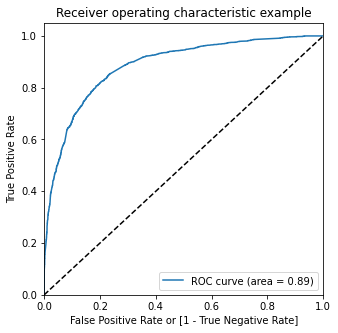

In [72]:
draw_roc(y_train_pred_final.Lead, y_train_pred_final.Lead_Prob)

In [73]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead,Lead_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.194158,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.363901,1012,0,1,1,1,1,0,0,0,0,0,0
2,0,0.210358,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.885469,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.673971,7987,1,1,1,1,1,1,1,1,0,0,0


In [74]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.597071  0.968929  0.364149
0.2   0.2  0.750433  0.918643  0.645070
0.3   0.3  0.800189  0.844644  0.772343
0.4   0.4  0.814360  0.771055  0.841485
0.5   0.5  0.815305  0.702780  0.885787
0.6   0.6  0.810581  0.639820  0.917542
0.7   0.7  0.781452  0.514309  0.948784
0.8   0.8  0.759408  0.421913  0.970807
0.9   0.9  0.714848  0.277596  0.988732


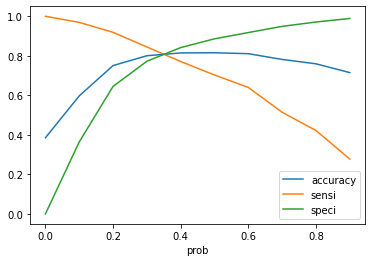

In [75]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [76]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Lead,Lead_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.194158,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.363901,1012,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.210358,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.885469,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.673971,7987,1,1,1,1,1,1,1,1,0,0,0,1


In [77]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.final_predicted)

0.8001889466225791

In [79]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.final_predicted )
confusion2

array([[3016,  889],
       [ 380, 2066]], dtype=int64)

In [80]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [81]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8446443172526574

In [82]:
# Let us calculate specificity
TN / float(TN+FP)

0.7723431498079385

In [83]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.22765685019206147


In [84]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6991539763113367


In [85]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8881036513545347


In [87]:
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
confusion

array([[3459,  446],
       [ 727, 1719]], dtype=int64)

In [88]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7939953810623557

In [89]:
from sklearn.metrics import precision_score, recall_score

In [92]:
precision_score(y_train_pred_final.Lead, y_train_pred_final.predicted)

0.7939953810623557

In [93]:
recall_score(y_train_pred_final.Lead, y_train_pred_final.predicted)

0.7027800490596893

In [94]:
from sklearn.metrics import precision_recall_curve

In [95]:
y_train_pred_final.Lead, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Lead, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [97]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Lead, y_train_pred_final.Lead_Prob)

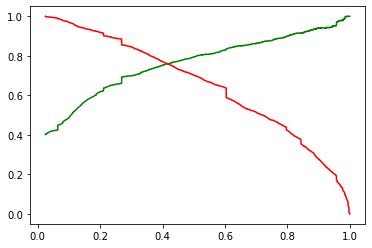

In [98]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [99]:
X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.transform(X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])

In [100]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Newspaper,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_google,...,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0,0,-0.600595,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1490,0,0,1.887326,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
7936,0,0,-0.752879,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4216,0,0,-0.888650,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3830,0,0,-0.587751,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [101]:
X_test_sm = sm.add_constant(X_test)

In [102]:
y_test_pred = res.predict(X_test_sm)

In [103]:
y_test_pred[:10]

3271    0.127568
1490    0.974890
7936    0.109550
4216    0.853798
3830    0.129198
1800    0.661239
6507    0.364026
4821    0.303611
4223    0.957125
4714    0.210358
dtype: float64

In [104]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [105]:
# Let's see the head
y_pred_1.head()

,0
3271,0.127568
1490,0.974890
7936,0.109550
4216,0.853798
3830,0.129198


In [106]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [107]:
# Putting CustID to index
y_test_df['ID'] = y_test_df.index

In [108]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [109]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [110]:
y_pred_final.head()

,Converted,ID,0
0,0,3271,0.127568
1,1,1490,0.974890
2,0,7936,0.109550
3,1,4216,0.853798
4,0,3830,0.129198


In [111]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Prob'})


In [115]:
y_pred_final= y_pred_final.rename(columns={ 'Converted' : 'Lead'})

In [117]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead,ID,Lead_Prob
0,0,3271,0.127568
1,1,1490,0.974890
2,0,7936,0.109550
3,1,4216,0.853798
4,0,3830,0.129198


In [119]:
y_pred_final['final_predicted'] = y_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [120]:
y_pred_final.head()

,Lead,ID,Lead_Prob,final_predicted
0,0,3271,0.127568,0
1,1,1490,0.974890,1
2,0,7936,0.109550,0
3,1,4216,0.853798,1
4,0,3830,0.129198,0


In [121]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Lead, y_pred_final.final_predicted)

0.8149100257069408

In [122]:
confusion2 = metrics.confusion_matrix(y_pred_final.Lead, y_pred_final.final_predicted )
confusion2

array([[1473,  261],
       [ 243,  746]], dtype=int64)

In [123]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [124]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7542972699696663

In [125]:
# Let us calculate specificity
TN / float(TN+FP)

0.8494809688581315